## Primer: genomski podatki v obliki nizov znakov

## Example: genomic data in the form of character strings

In [1]:
import json
sequences = json.load(open("../data/seqs.json"))

##### Odgovor 5-3-1

##### Answer 5-3-1

In [2]:
from itertools import product
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

def seq_to_kmer_count(seq, k=4):
    ktuples = list(zip(*[seq[i:] for i in range(k)]))
    kmers   = list(product(*(k*[["A", "C", "T", "G"]])))
    x = np.zeros((len(kmers), ))
    
    for ki, kmer in enumerate(kmers):
        x[ki] = ktuples.count(kmer)
    return x

In [3]:
k = 4
keys = sequences.keys()
X    = np.zeros((len(keys), 4**k))
for ki, ky in enumerate(keys):
    seq    = sequences[ky]
    X[ki]  = seq_to_kmer_count(seq, k=k)

X_freq = normalize(X, norm='l1', axis=1)  
print(X.shape)

(30, 256)


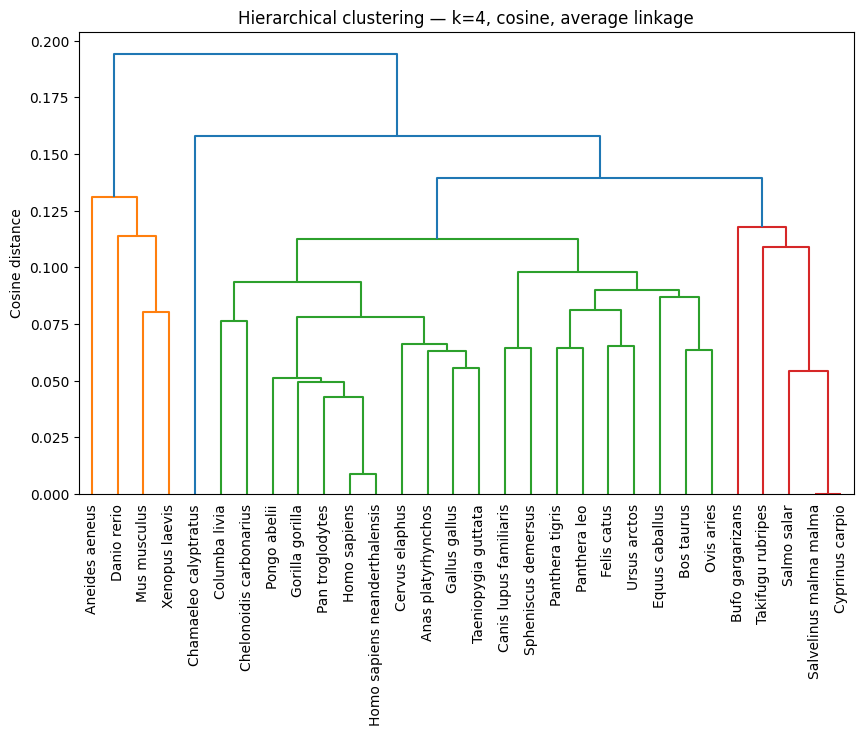

In [4]:
Z = sch.linkage(X, method='average', metric='cosine')
plt.figure(figsize=(10, 6))
sch.dendrogram(Z, labels=list(sequences.keys()), leaf_rotation=90)
plt.title(f"Hierarchical clustering — k={k}, cosine, average linkage")
plt.ylabel("Cosine distance")
plt.show()